<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (MSFT Inc.) using the past 60 day stock price. 

In [ ]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [ ]:
#Get the stock quote
data = yf.download('MSFT', start=start_date, end=end_date)
#df = web.DataReader('MSFT', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,158.205765,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,156.235825,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,156.639694,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,155.211456,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,157.683731,27746500
...,...,...,...,...,...,...
2021-07-15,282.000000,282.510010,279.829987,281.029999,281.029999,22604200
2021-07-16,282.070007,284.100006,279.459991,280.750000,280.750000,26176100
2021-07-19,278.929993,280.369995,274.450012,277.010010,277.010010,32935600


In [ ]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

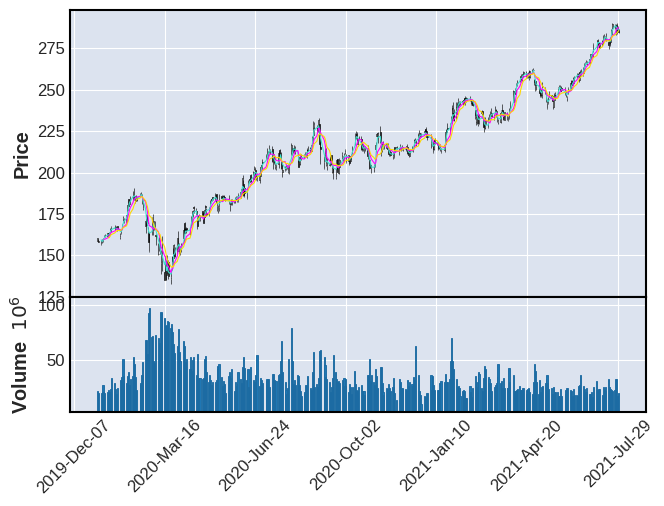

In [ ]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.16337111],
       [0.15040515],
       [0.1530632 ],
       [0.14366289],
       [0.15993514],
       [0.17290111],
       [0.16803887],
       [0.18061587],
       [0.17316048],
       [0.17996753],
       [0.19935168],
       [0.20538091],
       [0.20149108],
       [0.19630467],
       [0.20291734],
       [0.19202588],
       [0.17413289],
       [0.19474882],
       [0.21147483],
       [0.24220419],
       [0.22567257],
       [0.252577  ],
       [0.28978925],
       [0.28836299],
       [0.31254458],
       [0.31423012],
       [0.34541325],
       [0.31779578],
       [0.31954622],
       [0.31306323],
       [0.32369532],
       [0.33588326],
       [0.33620743],
       [0.31766609],
       [0.2798703 ],
       [0.22995136],
       [0.21166941],
       [0.22528361],
       [0.14755262],
       [0.17238246],
       [0.24226899],
       [0.18858991],
       [0.22774717],
       [0.20000002],
       [0.16953003],
       [0.0985413 ],
       [0.16531603],
       [0.118

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.16337111, 0.15040515, 0.1530632 , 0.14366289, 0.15993514,
       0.17290111, 0.16803887, 0.18061587, 0.17316048, 0.17996753,
       0.19935168, 0.20538091, 0.20149108, 0.19630467, 0.20291734,
       0.19202588, 0.17413289, 0.19474882, 0.21147483, 0.24220419,
       0.22567257, 0.252577  , 0.28978925, 0.28836299, 0.31254458,
       0.31423012, 0.34541325, 0.31779578, 0.31954622, 0.31306323,
       0.32369532, 0.33588326, 0.33620743, 0.31766609, 0.2798703 ,
       0.22995136, 0.21166941, 0.22528361, 0.14755262, 0.17238246,
       0.24226899, 0.18858991, 0.22774717, 0.20000002, 0.16953003,
       0.0985413 , 0.16531603, 0.11805514, 0.02359805, 0.15176662,
       0.        , 0.0722853 , 0.03228522, 0.04726099, 0.01251221,
       0.00363045, 0.08376011, 0.07455429, 0.1341329 , 0.09257697])]
[0.16084275594378006]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 11s 30ms/step - loss: 0.0132


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.6197386150118671

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


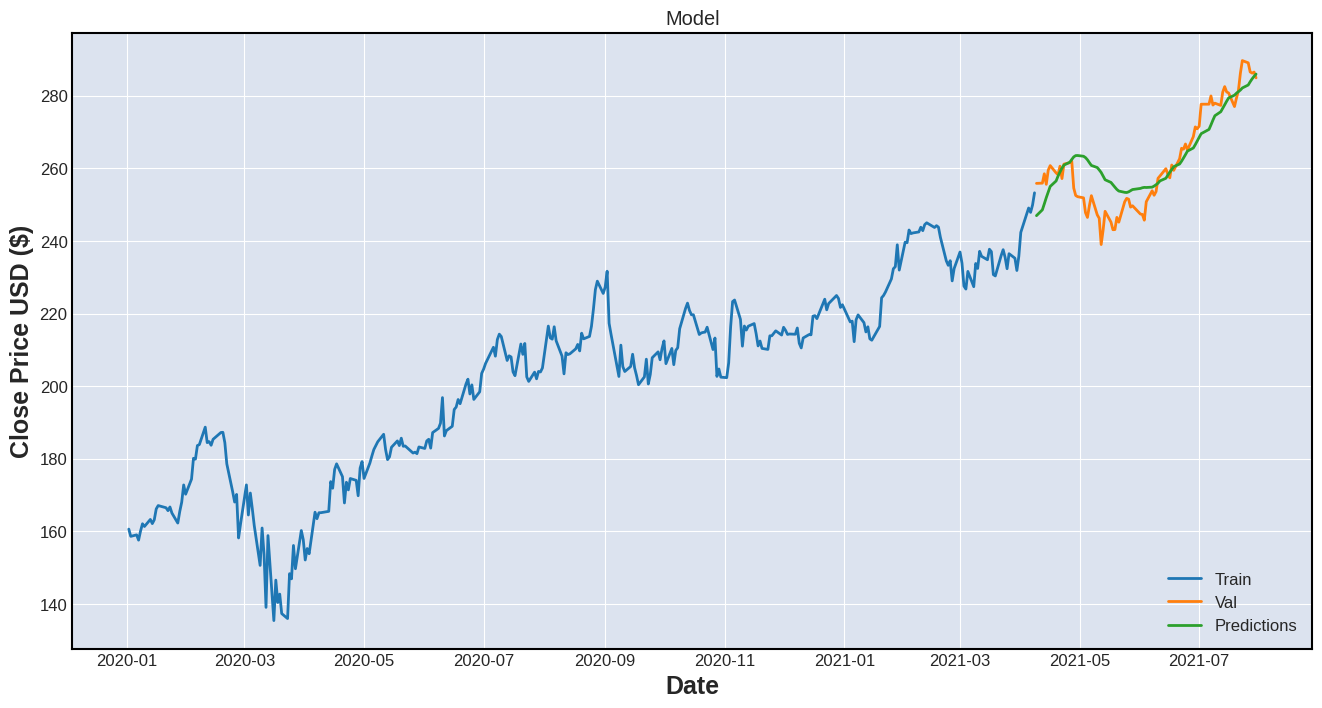

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,255.850006,246.956680
2021-04-12,255.910004,248.563095
2021-04-13,258.489990,250.213455
2021-04-14,255.589996,251.921021
2021-04-15,259.500000,253.471497
...,...,...
2021-07-26,289.049988,282.942139
2021-07-27,286.540009,283.834290
2021-07-28,286.220001,284.640808


In [ ]:
#get the quote
apple_quote = yf.download('MSFT', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[286.41107]]
